In [1]:
# 线性回归 输出是一个连续值，例如 房屋价格预测、气温预测、销售额等连续值问题。Softmax回归适用于分类问题，所得到的是个离散数值

In [2]:
#矢量计算 在处理多个样本并用矢量计算

In [8]:
from mxnet import nd
from time import time

In [4]:
a = nd.ones(shape = 1000)
b = nd.ones(shape = 1000)

In [5]:
start = time()
c = nd .zeros(shape = 1000)
for i in range(100):
    c[i] = a[i] + b[i]
time() - start
# 将这两个向量按元素逐一进行标量加法b

0.023411035537719727

In [6]:
start = time()
d = a + b
time() - start

0.0006296634674072266

In [7]:
#线性回归的从零开始实现
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random

In [9]:
#生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = nd.random.normal(scale = 1, shape=(num_examples, num_inputs))
lables = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
lables += nd.random.normal(scale = 0.01, shape = lables.shape)

In [11]:
features[0], lables[0]

(
 [1.1630787 0.4838046]
 <NDArray 2 @cpu(0)>,
 
 [4.879625]
 <NDArray 1 @cpu(0)>)

/var/folders/ts/3c_flg8s4p16j564h8j06mlw0000gn/T/ipykernel_2857/3812691258.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


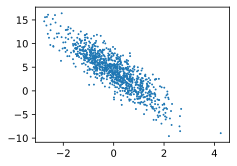

In [12]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), lables.asnumpy(),1);

In [13]:
#读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [15]:
batch_size = 10

for x,y in data_iter(batch_size, features, lables):
    print(x,y)
    break


[[ 0.1703758   1.4159781 ]
 [ 1.4452155   1.0359799 ]
 [-0.69776267  0.23392951]
 [ 0.00958298 -1.3464084 ]
 [-0.7019252   0.10999466]
 [ 1.5200766   0.2755394 ]
 [-0.9377883  -1.6933832 ]
 [-0.7687952   1.3430316 ]
 [-0.642467    0.56937444]
 [ 0.68650365  2.0535662 ]]
<NDArray 10x2 @cpu(0)> 
[-0.26755202  3.5656254   2.0069013   8.7929125   2.4173176   6.2904167
  8.084732   -1.8869959   1.0028826  -1.4055421 ]
<NDArray 10 @cpu(0)>


In [16]:
#初始化模型参数
w = nd.random.normal(scale = 0.01, shape = (num_inputs, 1))
b = nd.zeros(shape=(1,))

In [17]:
w.attach_grad()
b.attach_grad()